In [ ]:
import numpy as np
import pyproffit
import matplotlib.pyplot as plt
import os
from astropy.io import fits

os.getcwd()

In [ ]:
def DoubleBeta(x, beta, rc1, rc2, ratio, norm, const):
    out = np.power(10,norm) * (np.power(1 + (x / rc1) **2, -3 * beta + 0.5) + ratio * np.power(1 + (x / rc2) **2, -3 * beta + 0.5)) + np.power(10,const)
    return out
def BetaModel(x, beta, rc, norm,const):
    out = norm * np.power(1. + (x / rc) ** 2, -3. * beta + 0.5) + const
    return out

In [ ]:
beta = 42.068108; rc1 = 10.888732/60; rc2 =  30.13499/60; ratio = 0.23852488; norm = 3.9734867e-05; const = 4.24e-07
x = np.logspace(-3, 1, 100)
y = DoubleBeta(x, beta, rc1, rc2, ratio, norm, const)

plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')

In [ ]:
datapath = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302'
radec_lst = {'A222':[24.3941937, -12.9933436], "A223":[24.4830446, -12.8203439]}
doublebeta_para = {'0.5-7':[0.6, 1, 7, 0.23852488, -4, -6],
 "0.7-1.2":[0.6, 1, 7, 0.2, -5, -6]}
for ins in [ 'xmm']:#,'xmm','chandra'
    for band in ['0.5-7']:#, 
        for clus in ['A222',  'A223']:
            ra = radec_lst[clus][0]
            dec = radec_lst[clus][1]
            print(f'{ins}, {band}, {clus}, {ra}, {dec}')
            path = f'{datapath}/{ins}'
            if ins=='chandra':
                # reg = f'{path}/wavdetect_merge_clean_withexp_src_fk5.reg'
                img = f'{path}/images/{band}_band1_thresh.fits'
                # exp = f'{path}/images/0.5-7_band1_thresh_srcmsk_expmap.fits'
                exp = f'{path}/images/{band}_band1_thresh_srcmsk_{clus}filamsk_expmap_edgemsk.fits'
                bkg = f'{path}/images/{band}_band1_nxb_scaled.fits'
            elif ins=='xmm':
                # reg = f'{path}/EPIC_src_edit_man_fk5.reg'
                if band =='0.5-7':
                    img = f'{path}/{band}/EPIC_cts.fits'
                    # exp = f'{path}/{band}/EPIC_exp_srcmsk.fits'
                    exp = f'{path}/{band}/EPIC_exp_{clus}filamsk_srcmsk.fits'
                    bkg = f'{path}/{band}/EPIC_bkg.fits'
                elif band =='0.7-1.2':
                    img = f'{path}/{band}/EPIC_cts_700-1200.fits'
                    exp = f'{path}/{band}/EPIC_exp_700-1200_{clus}filamsk_srcmsk.fits'
                    bkg = f'{path}/{band}/EPIC_bkg_700-1200.fits'

            # # for nw region only
            # exp = f'{path}/0.5-7/EPIC_exp_A223_nw_xmm_exp.fits'
            dat=pyproffit.Data(imglink=img,explink=exp,bkglink=bkg)
            # fig = plt.figure(figsize=(6,6))
            # s1=plt.subplot(221)
            # plt.imshow(np.log10(dat.img),aspect='auto')
            # print(dat.img.max(), dat.img.min())
            # print(dat.bkg.max(), dat.bkg.min())
            # print((dat.img-dat.bkg).min(), (dat.img-dat.bkg).max())
            # s2=plt.subplot(222)
            # plt.imshow(dat.exposure,aspect='auto')
            
            prof=pyproffit.Profile(dat, center_choice='custom_fk5', center_ra = ra, center_dec =dec, maxrad=20., binsize=6, binning='log')
            prof.SBprofile(ellipse_ratio=1)#, angle_low=80, angle_high=140)

            # ## Beta
            # mod=pyproffit.Model(pyproffit.BetaModel)
            # fitobj=pyproffit.Fitter(model=mod, method='cstat', profile=prof, beta=0.6, rc=1, norm=-2, bkg=-2, fitlow=0., fithigh=10.)

            ### Double Beta
            mod=pyproffit.Model(pyproffit.DoubleBeta)
            beta, rc1,rc2, ratio, norm, bkg = doublebeta_para[band]
            fitobj=pyproffit.Fitter(model=mod, method='cstat', profile=prof, beta = beta, rc1 = rc1, rc2 =  rc2, ratio = ratio, norm = norm, bkg=bkg, fitlow=0.1, fithigh=20.)


            fitobj.Migrad()
            prof.Plot(model=mod)
            plt.title(f'{ins}, {band}, {clus}, {ra}, {dec}')

            # # inspecting results
            # # fitobj.minuit.minos()
            # #fitobj.minuit.draw_mncontour('beta', 'rc', cl=(0.68, 0.9, 0.99))
            os.makedirs(f'{datapath}/png', exist_ok=True)
            plt.savefig(f'{datapath}/png/A223_nw_{ins}_{clus}_{band}.pdf', dpi=300)
            # prof.Save(outfile=f"/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/results_230305/{clus}_{ins}_{band}_doublebeta_profile_inclfila.fits", model=mod)


plot only emos

In [ ]:
datapath = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/results_230422'
radec_lst = {'A222':[24.3941937, -12.9933436], "A223":[24.4830446, -12.8203439]}
doublebeta_para = {"700-1200":[0.6, 1, 7, 0.2, -3, -4], "1200-2000":[0.6, 1, 7, 0.2, -3, -4], "2000-5000":[0.6, 1, 7, 0.2, -2, -4], "5000-7000":[0.6, 1, 7, 0.2, -2, -4]}
for ins in ['EMOS', 'EPIC']:#,'xmm','chandra'
    for band in ['700-1200', '1200-2000', '2000-5000', '5000-7000']:#, 
        for clus in ['A222',  'A223']:
            ra = radec_lst[clus][0]
            dec = radec_lst[clus][1]
            img = f'{ins}_cts_{band}.img'
            exp = f'{ins}_exp_{band}_srcmsk_{clus}filamsk_expmap.fits'
            bkg = f'{ins}_bkg_{band}.img'      

            dat=pyproffit.Data(imglink=img, explink=exp, bkglink=bkg)
            prof=pyproffit.Profile(dat, center_choice='custom_fk5', center_ra = ra, center_dec =dec, maxrad=20., binsize=6, binning='log')
            prof.SBprofile(ellipse_ratio=1)#, angle_low=80, angle_high=140)
            
            ### Double Beta
            mod=pyproffit.Model(pyproffit.DoubleBeta)
            beta, rc1,rc2, ratio, norm, bkg = doublebeta_para[band]
            fitobj=pyproffit.Fitter(model=mod, method='cstat', profile=prof, beta = beta, rc1 = rc1, rc2 =  rc2, ratio = ratio, norm = norm, bkg=bkg, fitlow=0.1, fithigh=20.)
            
            fitobj.Migrad()
            prof.Plot(model=mod)
            plt.title(f'{ins}, {band}, {clus}, {ra}, {dec}')

            # # inspecting results
            # # fitobj.minuit.minos()
            # #fitobj.minuit.draw_mncontour('beta', 'rc', cl=(0.68, 0.9, 0.99))
            os.makedirs(f'{datapath}/png', exist_ok=True)
            plt.savefig(f'{datapath}/png/{ins}_{clus}_{band}.pdf', dpi=300)
            prof.Save(outfile=f"/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/results_230422/{clus}_{ins}_{band}_doublebeta_profile_inclfila.fits", model=mod)


plot obs and ins separately
1. mask the exp edge with 10arcmin circle centered on aimpoint
2. do the fitting and plot separately
3. merge
4. fit and plot the merged images


make masks for expmap

In [ ]:
from glob import glob
today = '2023-05-07'
# workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/results_230422' # 230422
workpath = f'/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/merged/2023-05-05'
os.makedirs(f'{workpath}/masks', exist_ok=True)
os.system(f'cp {workpath}/../2023-05-04/masks/*reg {workpath}/masks')
f = open(f'{workpath}/masks/make_masks_{today}.sh', 'w')
for obs in [101,201]:
    for ins in ['EMOS1', 'EMOS2', 'EPN']: # 
        files = glob(f'{workpath}/{ins}_exp_obs{obs}*.img')
        for file in files:
            f.write(f"ftimgcalc {workpath}/masks/{file.split('/')[-1]}_edgemsk.fits 'regfilter(\"{workpath}/masks/{ins}_obs{obs}_edgemsk.reg\",A.P1,A.P2) ? (1):(0)' a={file} clobber=yes\n")
            f.write(f"ftimgcalc {workpath}/masks/{file.split('/')[-1]}_srcmsk.fits 'regfilter(\"{workpath}/masks/EPIC_src_edit_man_fk5_1e-6.reg\",A.P1,A.P2) ? (0):(1)' a={file} clobber=yes\n")
            for clus in ['A222', 'A223']:
                f.write(f"ftimgcalc {workpath}/masks/{file.split('/')[-1]}_{clus}_filamsk.fits 'regfilter(\"{workpath}/masks/{clus}_filamsk_xmm.reg\",A.P1,A.P2) ? (0):(1)' a={file} clobber=yes\n")

f.close()

# sh masks/make_masks*.sh

mask edge, filamsk, sources from the exp maps

In [ ]:
from glob import glob
today = '2023-05-07'
os.chdir(workpath)
f = open(f'masks/mask_exps_{today}.sh', 'w')
f.write('#!/bin/bash\n')
for obs in [101,201]:
    for ins in ['EMOS1', 'EMOS2', 'EPN']: # 
        files = glob(f'{ins}_exp_obs{obs}*.img')
        for file in files:
            f.write(f"farith masks/{file.split('/')[-1]}_edgemsk.fits {file} {file.split('/')[-1].split('.')[0]}_{today}_edgemsk.fits '*' clobber=yes\n")
            f.write(f"farith {file.split('/')[-1].split('.')[0]}_{today}_edgemsk.fits masks/{file.split('/')[-1]}_srcmsk.fits {file.split('/')[-1].split('.')[0]}_{today}_edgemsk_srcmsk.fits '*' clobber=yes\n")
            for clus in ['A222', 'A223']:
                f.write(f"farith masks/{file.split('/')[-1]}_{clus}_filamsk.fits {file.split('/')[-1].split('.')[0]}_{today}_edgemsk_srcmsk.fits {file.split('/')[-1].split('.')[0]}_{today}_edgemsk_srcmsk_{clus}_filamsk.fits '*' clobber=yes\n")
f.close()

alter background file name

In [ ]:
bkgfiles = glob('*scaled*.img')
for file in bkgfiles:
    if '-' in file:
        band = file.split('_')[-2]
        obs = file.split('_')[5]
        if 'mos1' in file:
            os.system(f'cp {file} EMOS1_bkg_{obs}_{band}.fits')
        elif 'mos2' in file:
            os.system(f'cp {file} EMOS2_bkg_{obs}_{band}.fits')
        elif 'pn' in file:
            band = file.split('_')[-3]
            obs = file.split('_')[5]
            os.system(f'cp {file} EPN_bkg_{obs}_{band}.fits')
        else:
            raise ValueError('wrong types!')


        

plot obs, ins, bands separately

In [ ]:
import datetime
today = '2023-05-05'
maxrad = 10.
# datapath = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/results_230422'
# datapath = f'/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/merged/{today}'
os.chdir(datapath)
radec_lst = {'A222':[24.3941937, -12.9933436], "A223":[24.4830446, -12.8203439]}
doublebeta_para = {"700-1200":[0.6, 1, 7, 0.2, -2, -4], "1200-2000":[0.6, 1, 7, 0.2, -1, -4], "2000-5000":[0.6, 1, 7, 0.2, -2, -4], "5000-7000":[0.6, 1, 7, 0.2, -2, -4]}
for ins in ['EMOS1', 'EMOS2', 'EPN']:#,'xmm','chandra'
    for obs in ['101', '201']:
        for band in ['700-1200', '700-7000']:#, '1200-2000', '2000-5000', '5000-7000']:#, 
            for clus in ['A222',  'A223']:
                ra = radec_lst[clus][0]
                dec = radec_lst[clus][1]
                # img = f'{ins}_counts_obs{obs}_{band}.img'
                # exp = f'{ins}_exp_obs{obs}_edgemsk_srcmsk_{clus}_filamsk.fits'
                # bkg = f'{ins}_bkg_obs{obs}_{band}.fits'
                img = f'{ins}_counts_obs{obs}_{band}_{today}.img'
                exp = f'{ins}_exp_obs{obs}_{band}_{today}_edgemsk_srcmsk.fits'
                # exp = f'{ins}_exp_obs{obs}_{band}_{today}_edgemsk_srcmsk_{clus}_filamsk.fits'
                bkg = glob(f'../2023-05-07-bkg/{ins}_obs{obs}_bkg_clean_2023-05-07_{band}_scaled*.img')[0]

                dat=pyproffit.Data(imglink=img, explink=exp, bkglink=bkg)
                prof=pyproffit.Profile(dat, center_choice='custom_fk5', center_ra = ra, center_dec =dec, maxrad=maxrad, binsize=6, binning='log')
                prof.SBprofile(ellipse_ratio=1)#, angle_low=80, angle_high=140)
                
                ### Double Beta
                mod=pyproffit.Model(pyproffit.DoubleBeta)
                beta, rc1,rc2, ratio, norm, bkg = doublebeta_para[band]
                fitobj=pyproffit.Fitter(model=mod, method='cstat', profile=prof, beta = beta, rc1 = rc1, rc2 =  rc2, ratio = ratio, norm = norm, bkg=bkg, fitlow=0.1, fithigh=maxrad)
                
                fitobj.Migrad()
                prof.Plot(model=mod)
                plt.title(f'{ins}, {band}, {clus}, {ra}, {dec}\n {mod.parnames} \n {mod.params}  ')

                # # inspecting results
                # # fitobj.minuit.minos()
                # #fitobj.minuit.draw_mncontour('beta', 'rc', cl=(0.68, 0.9, 0.99))
                os.makedirs(f'{datapath}/png/{int(maxrad)}am/{today}', exist_ok=True)
                os.makedirs(f'{datapath}/profiles/{int(maxrad)}am/{today}', exist_ok=True)
                plt.savefig(f'{datapath}/png/{int(maxrad)}am/{today}/{ins}_{clus}_{band}_{obs}_inclfila.png')
                prof.Save(outfile=f"{datapath}/profiles/{int(maxrad)}am/{today}/{clus}_{ins}_{band}_obs{obs}_doublebeta_profile_inclfila.fits", model=mod)

                

# plot merged obs and ins of combined bands

merge masked exp maps

In [ ]:
# error: can't use astropy fits or farith to sum up, only can use farith or emosaic. 
# Since they can't align coordinates of different observations and instruments. 
# The data image array size will also be different.


create profiles for merged or separate bands, merged obs and merged instruments

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Invalid DATE-END format '??      ''. [astropy.wcs.wcs]


Corresponding pixels coordinates:  354.7745871291808 279.0716271379407
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 130                        │             Nfcn = 1171              │
│ EDM = 3.62e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬────

Corresponding pixels coordinates:  276.81107451974054 434.76259747344596
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 219.3                      │              Nfcn = 498              │
│ EDM = 0.000113 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬──

/Users/eusracenorth/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pyproffit/models.py:58: RuntimeWarning: overflow encountered in power
  n2 = np.power(10., norm)
/Users/eusracenorth/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pyproffit/models.py:59: RuntimeWarning: overflow encountered in power
  c2 = np.power(10., bkg)
/Users/eusracenorth/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pyproffit/models.py:57: RuntimeWarning: overflow encountered in power
  comp2 = np.power(1. + (x / rc2) ** 2, -3. * beta + 0.5)
/Users/eusracenorth/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pyproffit/models.py:60: RuntimeWarning: overflow encountered in multiply
  out = n2 * (comp1 + ratio * comp2) + c2
/Users/eusracenorth/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pyproffit/fitting.py:74: RuntimeWarning: overflow encountered in square
  chi2 = np.sum((self.y[reg][nonz] - ym[reg][nonz])**2/self.dy[reg][nonz]**2)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 301.7                      │             Nfcn = 1255              │
│ EDM = 7.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

/Users/eusracenorth/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pyproffit/profextract.py:935: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


Corresponding pixels coordinates:  354.7745871291808 279.0716271379407
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 74.23                      │              Nfcn = 376              │
│ EDM = 6.09e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬────

/Users/eusracenorth/.pyenv/versions/3.10.1/lib/python3.10/site-packages/pyproffit/models.py:60: RuntimeWarning: invalid value encountered in add
  out = n2 * (comp1 + ratio * comp2) + c2


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 129.1                      │              Nfcn = 730              │
│ EDM = 1.65e+11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

Corresponding pixels coordinates:  354.7745871291808 279.0716271379407
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 124.9                      │              Nfcn = 858              │
│ EDM = 3.85e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬────

<Figure size 600x600 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

<Figure size 1300x1000 with 0 Axes>

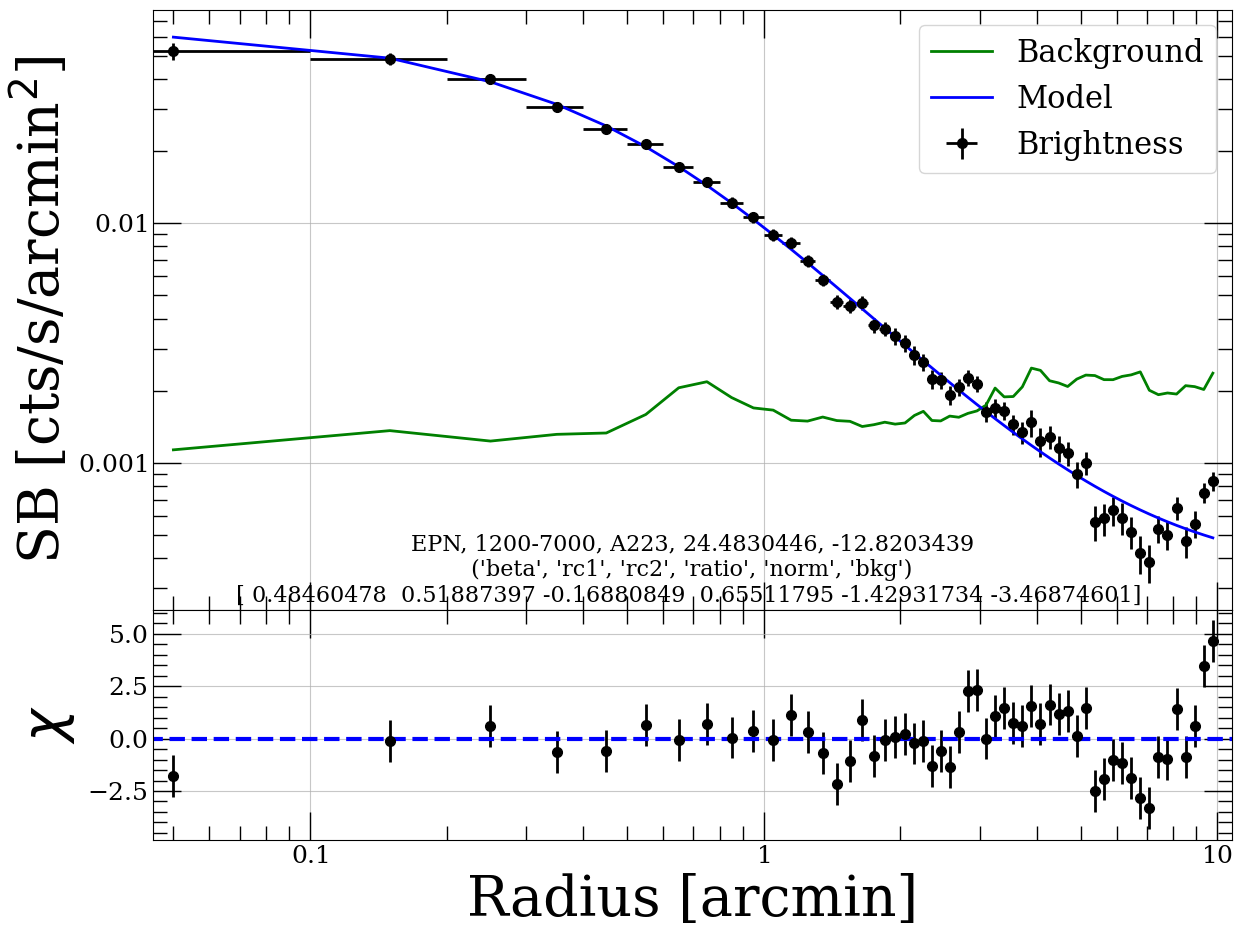

In [114]:
datapath = f'/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/merged/2023-05-07_merge_obs_inst_bands'
today = '2023-05-07'
maxrad = 10.
os.chdir(datapath)
radec_lst = {'A222':[24.3941937, -12.9933436], "A223":[24.4830446, -12.8203439]}
doublebeta_para = {"700-1200":[0.6, 1, 7, 0.2, -2, -3], "1200-2000":[0.6, 1, 7, 0.2, -2, -3.2], "2000-5000":[0.6, 1, 7, 0.2, -2, -3], 
"5000-7000":[0.6, 1, 7, 0.2, -3, -3], "700-7000":[0.6, 1, 7, 0.2, -2, -2.5], "700-2000":[0.6, 1, 7, 0.2, -2, -3],
"2000-7000":[0.6, 1, 7, 0.2, -2.5, -3] , "1200-7000":[0.6, 1, 7, 0.2, -2, -3]}
for ins in ['EPIC', 'EMOS','EPN']:#,'xmm','chandra'
        for band in ['700-1200', '1200-2000', '2000-5000', '5000-7000', '700-7000', "700-2000", "2000-7000", "1200-7000"]:#, 
            for clus in ['A222', 'A223']:
                ra = radec_lst[clus][0]
                dec = radec_lst[clus][1]

                img = f'{ins}_cts_{band}_{today}.img'
                # exp = f'{ins}_exp_{band}_{today}_edgemsk_srcmsk_{clus}_filamsk_bigeschipgapmasked.fits'
                # exp = f'{ins}_exp_{band}_{today}_edgemsk_srcmsk_{clus}_filamsk.fits'
                exp = f'{ins}_exp_{band}_{today}_edgemsk_srcmsk_bigeschipgapmasked.fits'
                bkg = glob(f'{ins}_bkg_{band}_{today}.img')[0]

                dat=pyproffit.Data(imglink=img, explink=exp, bkglink=bkg)
                prof=pyproffit.Profile(dat, center_choice='custom_fk5', center_ra = ra, center_dec =dec, maxrad=maxrad, binsize=6, binning='log')
                prof.SBprofile(ellipse_ratio=1)#, angle_low=80, angle_high=140)
                
                ### Double Beta
                mod=pyproffit.Model(pyproffit.DoubleBeta)
                beta, rc1,rc2, ratio, norm, bkg = doublebeta_para[band]
                fitobj=pyproffit.Fitter(model=mod, method='chi2', profile=prof, beta = beta, rc1 = rc1, rc2 =  rc2, ratio = ratio, norm = norm, bkg=bkg, fitlow=0.1, fithigh=maxrad)
                
                fitobj.Migrad()
                prof.Plot(model=mod)
                plt.title(f'{ins}, {band}, {clus}, {ra}, {dec}\n {mod.parnames} \n {mod.params}  ')

                # # inspecting results
                # # fitobj.minuit.minos()
                # #fitobj.minuit.draw_mncontour('beta', 'rc', cl=(0.68, 0.9, 0.99))
                os.makedirs(f'{datapath}/png/{int(maxrad)}am/{today}', exist_ok=True)
                os.makedirs(f'{datapath}/profiles/{int(maxrad)}am/{today}', exist_ok=True)
                plt.savefig(f'{datapath}/png/{int(maxrad)}am/{today}/{ins}_{clus}_{band}_inclfila_bigeschipgapmasked.png')
                prof.Save(outfile=f"{datapath}/profiles/{int(maxrad)}am/{today}/{clus}_{ins}_{band}_doublebeta_profile_inclfila_bigeschipgapmasked.fits", model=mod)

                

mask strange chip in A222 profile

In [78]:
from glob import glob
today = '2023-05-08'
workpath = f'/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/merged/2023-05-07_merge_obs_inst_bands'
os.chdir(workpath)
f = open(f'{workpath}/masks/mask_eschipgap_big_A222_nofilamsk_{today}.sh', 'w')
f.write('#!/bin/bash\n')
for inst in ['EMOS', 'EPIC', 'EPN']:
    files = glob(f'{workpath}/{inst}_exp_*_edgemsk_srcmsk.fits')
    for file in files:
        f.write(f"ftimgcalc masks/{file.split('/')[-1].split('.')[0]}_bigeschipgapmsk.fits 'regfilter(\"masks/A222_eschip_gap_big.reg\",A.P1,A.P2) ? (0):(1)' a={file} clobber=yes\n")
        f.write(f"farith masks/{file.split('/')[-1].split('.')[0]}_bigeschipgapmsk.fits {file} {file.split('/')[-1].split('.')[0]}_bigeschipgapmasked.fits '*' clobber=yes\n")
f.close()



In [90]:
def basic_figure_style():
    SMALL_SIZE = 5*4                                       
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*4

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=3) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)
    plt.rc('figure', figsize='6, 6')                         # size of the figure, used to be '4, 3' in inches
    ######################################################
basic_figure_style()


In [ ]:
from glob import glob
cb = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
path = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/results_230305'
xmmfiles = glob(f'{path}/*chan*0.7-1.2*doublebeta*10am*')
xmmfiles = np.sort(xmmfiles)
print(xmmfiles)
fig, axs = plt.subplots(2, len(xmmfiles), sharex=True, figsize=(len(xmmfiles)*10,8),gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0,wspace=0.2)
fig.align_ylabels()
for i, fname in enumerate(xmmfiles):
    hdul = fits.open(fname)
    dat = hdul[1].data 
    mdl = hdul[2].data
    model = DoubleBeta(dat['RADIUS'], mdl['VALUE'][0], mdl['VALUE'][1], mdl['VALUE'][2],  mdl['VALUE'][3],  mdl['VALUE'][4],  mdl['VALUE'][5])
    axs[0,i].errorbar(dat['RADIUS'], dat['SB'], yerr=dat['ERR_SB'], xerr=dat['WIDTH'], c = 'k', label = 'data', alpha=0.8,fmt = 'o')
    axs[0,i].plot(dat['RADIUS'], model, label = 'model', c = 'b')
    axs[0,i].plot(dat['RADIUS'], dat['BKG'], label = 'bkg', c = 'g')
    
    chi = (dat['SB'] - model) / dat['ERR_SB']
    axs[1,i].errorbar(dat['RADIUS'], chi, yerr=np.ones(len(dat['RADIUS'])),  c = 'k', label = 'data', alpha=0.8, fmt='o')
    axs[1,i].axhline(0, c='b', linestyle = '--')

    # axs[0,i].set_title(f'{fname.split("/")[-1]}')
    axs[0,i].set_yscale('log')
    # axs[0,i].set_ylim(1e-7,0.01)
    axs[1,i].set_yscale('linear')

for i in range(2):
    for j in range(len(xmmfiles)):
        axs[i,j].minorticks_on()
        axs[i,j].tick_params(length=20, width=1, which='major', direction='in', right=True, top=True)
        axs[i,j].tick_params(length=10, width=1, which='minor', direction='in', right=True, top=True)
        axs[i,j].set_xlabel('Radius [arcmin]')
        axs[0,j].set_ylabel('SB [$\\rm cts/s/cm^2/arcmin^2$]')
        axs[1,j].set_ylabel('$\chi$')
axs[0,1].legend(frameon=False)
plt.xscale('log')
plt.yscale('linear')

# plt.savefig(f'{path}/pdf/{fnasplit("/")[-1].split(".fits")[0]}_A222left_A223right_sbprofile.pdf', dpi=300)
# print(f'{fname.split("/")[-1].splime.t(".fits")[0]}_A222left_A223right_sbprofile.pdf has been saved!')


make camel-like plot 
https://arxiv.org/pdf/2110.06224.pdf 

Text(0.5, 1.0, 'XMM 1200-2000 eV')

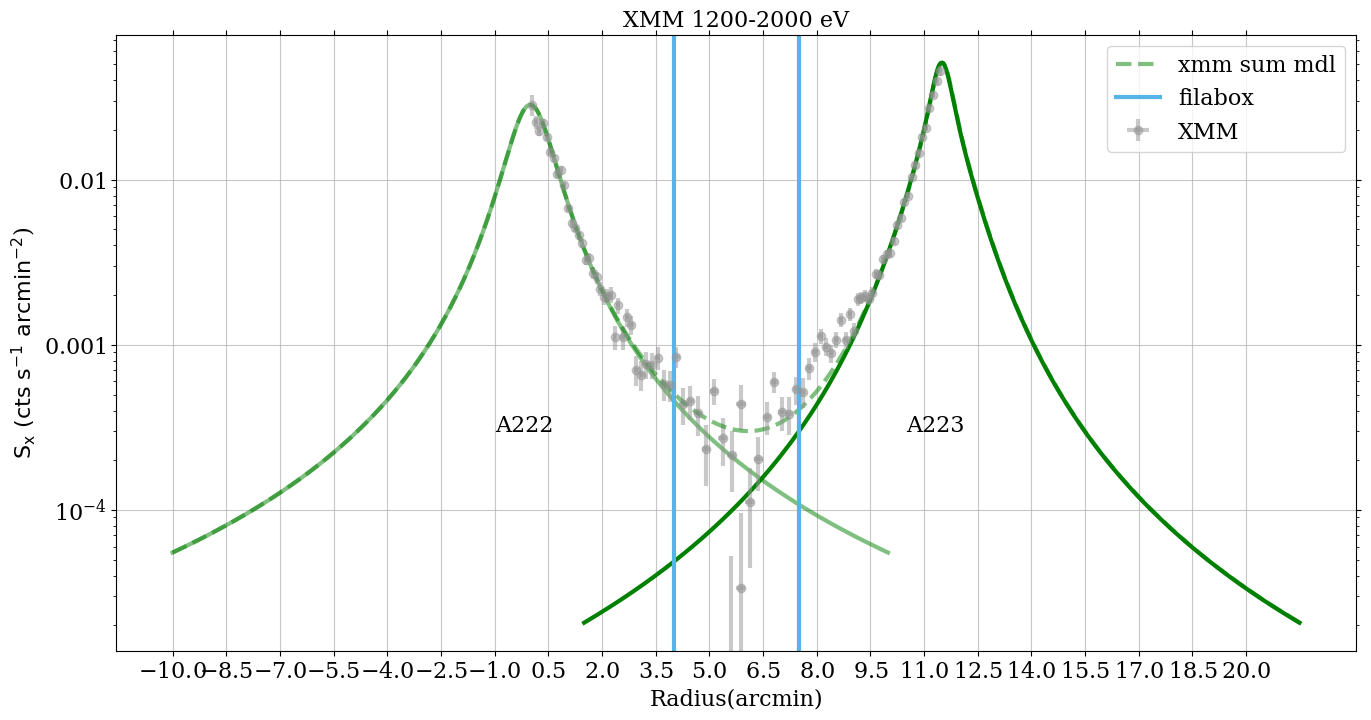

In [119]:
from glob import glob
today = '2023-05-07'
chandra_path = '/Users/eusracenorth/Documents/suzaku_A222-223/profile_230302/results_230305'
xmm_path = f'/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/merged/{today}_merge_obs_inst_bands/profiles/10am/{today}'
savepath = f'/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/merged/{today}_merge_obs_inst_bands/png/camelplot'
os.makedirs(savepath, exist_ok=True)

cb = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
chandra_Aeff = 420


def DoubleBeta_wobkg(x, beta, rc1, rc2, ratio, norm):
    out = np.power(10,norm) * (np.power(1 + (x / rc1) **2, -3 * beta + 0.5) + ratio * np.power(1 + (x / rc2) **2, -3 * beta + 0.5))
    return out
fig, ax = plt.subplots(figsize = (16,8))



## load xmm data

# xmm_skybg = np.array([0.0033413481427292846, 0.002563827590320338])
# skybg = xmm_skybg.min()#/3.08
skybg = (1.77e-3+2*5.485e-4)/5*3/3.08
# plt.axhline(skybg)
x_mdl = np.arange(-10,11.5+10+0.01,0.01)
xmm_Aeff = 1 #400
fname = glob(f'{xmm_path}/*A222*EPIC*1200-2000*doublebeta_profile_notinclfila_bigeschipgapmasked.fits')[0]
hdul = fits.open(fname)
dat = hdul[1].data 
mdl = hdul[2].data
a222mdl = DoubleBeta_wobkg(np.arange(0,10,0.01), mdl['VALUE'][0], mdl['VALUE'][1], mdl['VALUE'][2],  mdl['VALUE'][3],  mdl['VALUE'][4])
y_a222mdl = np.concatenate((a222mdl[::-1], a222mdl))/xmm_Aeff
x_a222mdl = np.arange(-10,10, 0.01)
plt.plot(x_a222mdl, y_a222mdl, c = 'g', alpha = 0.5)
msk = dat['RADIUS'] < 6
# plt.errorbar(dat['RADIUS'][msk], (dat['SB'][msk]-skybg)/xmm_Aeff, yerr=dat['ERR_SB'][msk]/xmm_Aeff, xerr=dat['WIDTH'][msk], c = cb[-5],alpha=0.5,fmt = 'o')

# plt.axhline(skybg/xmm_Aeff, label = '0', c = cb[0])
fname = glob(f'{xmm_path}/*A222*EPIC*1200-2000*doublebeta_profile_inclfila_bigeschipgapmasked.fits')[0]
hdul = fits.open(fname)
dat = hdul[1].data 
mdl = hdul[2].data
msk = dat['RADIUS'] < 6
plt.errorbar(dat['RADIUS'][msk], (dat['SB'][msk]-skybg)/xmm_Aeff, yerr=dat['ERR_SB'][msk]/xmm_Aeff, xerr=dat['WIDTH'][msk], c = cb[-3],alpha=0.5,fmt = 'o')
xmm_Aeff = 1 #400
fname = glob(f'{xmm_path}/*A223*EPIC*1200-2000*doublebeta_profile_notinclfila.fits')[0]
hdul = fits.open(fname)
dat = hdul[1].data 
mdl = hdul[2].data
a223mdl = DoubleBeta_wobkg(np.arange(0,10,0.01), mdl['VALUE'][0], mdl['VALUE'][1], mdl['VALUE'][2],  mdl['VALUE'][3],  mdl['VALUE'][4])
y_a223mdl = np.concatenate((a223mdl[::-1], a223mdl))/xmm_Aeff
x_a223mdl = np.arange(11.5-10,11.5+10, 0.01)
plt.plot(x_a223mdl, y_a223mdl, c = 'g')
y_mdl = np.zeros(x_mdl.shape)
y_mdl[(x_mdl>(x_a222mdl[0]-0.01))&(x_mdl<=x_a222mdl[-1])] = y_a222mdl
y_mdl[(x_mdl>=x_a223mdl[0])&(x_mdl<(x_a223mdl[-1]+0.01))] += y_a223mdl
plt.plot(x_mdl, y_mdl,c = 'g', alpha = 0.5,linestyle = '--', label = 'xmm sum mdl')
msk = dat['RADIUS'] < 6

# plt.errorbar(11.5-dat['RADIUS'][msk], (dat['SB'][msk]-skybg)/xmm_Aeff, yerr=dat['ERR_SB'][msk]/xmm_Aeff, xerr=dat['WIDTH'][msk], c = cb[-5],alpha=0.5,fmt = 'o', label = 'xmm_wofila')

# plt.axhline(skybg/xmm_Aeff, label = '1', c = cb[1])
fname = glob(f'{xmm_path}/*A223*EPIC*1200-2000*doublebeta_profile_inclfila_bigeschipgapmasked.fits')[0]
hdul = fits.open(fname)
dat = hdul[1].data 
mdl = hdul[2].data
msk = dat['RADIUS'] < 6
plt.errorbar(11.5-dat['RADIUS'][msk], (dat['SB'][msk]-skybg)/xmm_Aeff, yerr=dat['ERR_SB'][msk]/xmm_Aeff, xerr=dat['WIDTH'][msk], c = cb[-3],label = 'XMM',alpha=0.5,fmt = 'o')

# ### load chandra models
# fname = glob(f'{chandra_path}/*A222*chan*0.5-7*doublebeta*10am*')[0]
# hdul = fits.open(fname)
# dat = hdul[1].data 
# mdl = hdul[2].data

# # plt.errorbar(dat['RADIUS'], dat['SB']-np.power(10,mdl['VALUE'][5]), yerr=dat['ERR_SB'], xerr=dat['WIDTH'], c = cb[-2], alpha=0.5,fmt = 'o')

# a222mdl = DoubleBeta_wobkg(np.arange(0,10,0.01), mdl['VALUE'][0], mdl['VALUE'][1], mdl['VALUE'][2],  mdl['VALUE'][3],  mdl['VALUE'][4])
# y_a222mdl = np.concatenate((a222mdl[::-1], a222mdl))
# x_a222mdl = (-10,10)


# fname = glob(f'{chandra_path}/*A223*chan*0.5-7*doublebeta*10am*')[0]
# hdul = fits.open(fname)
# dat = hdul[1].data 
# mdl = hdul[2].data
# # plt.errorbar(6 - dat['RADIUS'], dat['SB']-np.power(10,mdl['VALUE'][5]), yerr=dat['ERR_SB'], xerr=dat['WIDTH'], label = 'Chandra', c = cb[-2],alpha=0.5,fmt = 'o')

# a223mdl = DoubleBeta_wobkg(np.arange(0,10,0.01), mdl['VALUE'][0], mdl['VALUE'][1], mdl['VALUE'][2],  mdl['VALUE'][3],  mdl['VALUE'][4])
# y_a223mdl = np.concatenate((a223mdl[::-1], a223mdl))
# x_a223mdl = (11.5-10,11.5+10)

# x_mdl = np.arange(-10,11.5+10+0.01,0.01)
# y_mdl = np.zeros(x_mdl.shape)
# y_mdl[(x_mdl>x_a222mdl[0])&(x_mdl<=x_a222mdl[1])] = y_a222mdl
# plt.plot(x_mdl, y_mdl* chandra_Aeff,c = 'r', alpha = 0.5)
# y_mdl = np.zeros(x_mdl.shape)
# y_mdl[(x_mdl>=x_a223mdl[0])&(x_mdl<x_a223mdl[1])] = y_a223mdl
# plt.plot(x_mdl, y_mdl* chandra_Aeff,c = 'r', alpha = 0.5)
# y_mdl = np.zeros(x_mdl.shape)
# y_mdl[(x_mdl>x_a222mdl[0])&(x_mdl<=x_a222mdl[1])] = y_a222mdl
# y_mdl[(x_mdl>=x_a223mdl[0])&(x_mdl<x_a223mdl[1])] += y_a223mdl
# plt.plot(x_mdl, y_mdl* chandra_Aeff, c = 'r', alpha = 0.5,linestyle = '--', label = 'chandra sum mdl')

# ## load chandra data
# chan_skybg = np.array([1.563939922864141e-06, 1.7019209655102093e-06])
# skybg = chan_skybg.min()#/3.08 ##3.08 for0.5-7 keV

# skybg = 2.723e-4/5*3/3.08
# # plt.axhline(skybg)
# fname = glob(f'{chandra_path}/*A222*chandra*0.5-7*doublebeta_profile.fits')[0]
# hdul = fits.open(fname)
# dat = hdul[1].data 
# mdl = hdul[2].data
# msk = dat['RADIUS'] < 6
# # plt.errorbar(dat['RADIUS'][msk], (dat['SB'])[msk]* chandra_Aeff-skybg, yerr=dat['ERR_SB'][msk]* chandra_Aeff, xerr=dat['WIDTH'][msk], c = cb[-2],alpha=0.5,fmt = 'o')

# fname = glob(f'{chandra_path}/*A222*chandra*0.5-7*doublebeta_profile_inclfila.fits')[0]
# hdul = fits.open(fname)
# dat = hdul[1].data 
# mdl = hdul[2].data
# msk = dat['RADIUS'] < 6
# plt.errorbar(dat['RADIUS'][msk], (dat['SB'])[msk]* chandra_Aeff-skybg, yerr=dat['ERR_SB'][msk]* chandra_Aeff, xerr=dat['WIDTH'][msk], c = cb[-4],alpha=0.5,fmt = 'o')

# fname = glob(f'{chandra_path}/*A223*chandra*0.5-7*doublebeta_profile.fits')[0]
# hdul = fits.open(fname)
# dat = hdul[1].data 
# mdl = hdul[2].data
# msk = dat['RADIUS'] < 6
# # plt.errorbar(11.5-dat['RADIUS'][msk], (dat['SB'])[msk]* chandra_Aeff-skybg, yerr=dat['ERR_SB'][msk]* chandra_Aeff, xerr=dat['WIDTH'][msk], c = cb[-2],label = 'chandra_wofila',alpha=0.5,fmt = 'o')

# fname = glob(f'{chandra_path}/*A223*chandra*0.5-7*doublebeta_profile_inclfila.fits')[0]
# hdul = fits.open(fname)
# dat = hdul[1].data 
# mdl = hdul[2].data
# msk = dat['RADIUS'] < 6
# plt.errorbar(11.5-dat['RADIUS'][msk], (dat['SB'])[msk]* chandra_Aeff-skybg, yerr=dat['ERR_SB'][msk]* chandra_Aeff, xerr=dat['WIDTH'][msk], c = cb[-4],label = 'chandra',alpha=0.5,fmt = 'o')

plt.text(10.5,3e-4, 'A223')
plt.text(-1,3e-4, 'A222')
plt.axvline(4, c= cb[-1])
plt.axvline(4+3.5, c = cb[-1], label = 'filabox')
plt.yscale('log')
plt.ylabel('$\\rm S_x\ (cts\ s^{-1}\ arcmin^{-2}$)')
plt.xlabel('Radius(arcmin)')
plt.legend()
plt.xticks(np.arange(-10, 11.5+10,1.5))
plt.title('XMM 1200-2000 eV')


(1500,)